In [2]:
#Measure the correlation between contextand answer
import pandas as pd
from scipy.stats import pearsonr


file_path = '../data/new_corpus.csv'
corpus_data = pd.read_csv(file_path)

corpus_data['text_length'] = corpus_data['context'].apply(len)
corpus_data['summary_length'] = corpus_data['answers'].apply(lambda x: len(str(x)))

correlation = corpus_data[['text_length', 'summary_length']].corr()

print("Correlation matrix:")
print(correlation)

corr_value, p_value = pearsonr(corpus_data['text_length'], corpus_data['summary_length'])

print("\nPearson correlation coefficient:", corr_value)
print("P-value:", p_value)


Correlation matrix:
                text_length  summary_length
text_length        1.000000       -0.203357
summary_length    -0.203357        1.000000

Pearson correlation coefficient: -0.20335667022401321
P-value: 0.04138667152535217


--------------------------------
mode: two-sided
Pearson: -2.0336e-01; p-value: +4.1387e-02
Spearman: -1.4790e-01; p-value: +1.3995e-01
--------------------------------
mode: greater
Pearson: -2.0336e-01; p-value: +4.1387e-02
Spearman: -1.4790e-01; p-value: +1.3995e-01
--------------------------------
mode: less
Pearson: -2.0336e-01; p-value: +4.1387e-02
Spearman: -1.4790e-01; p-value: +1.3995e-01


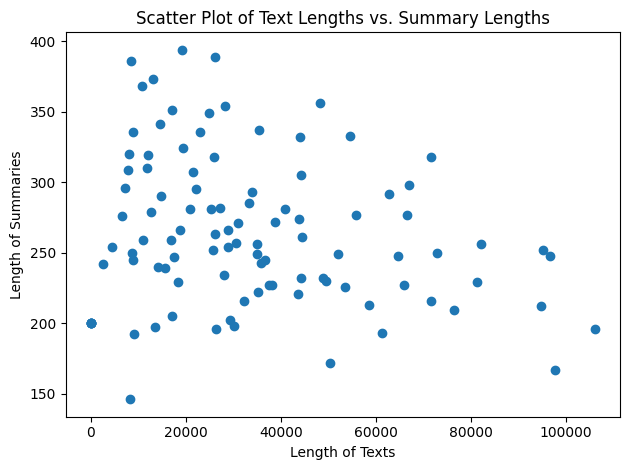

In [4]:
import pandas as pd
import numpy as np
import scipy.stats
import matplotlib.pyplot as plt


file_path = '../data/new_corpus.csv'
corpus_data = pd.read_csv(file_path)


corpus_data['text_length'] = corpus_data['context'].apply(len)
corpus_data['summary_length'] = corpus_data['answers'].apply(lambda x: len(str(x)))


text_lengths = corpus_data['text_length'].values
summary_lengths = corpus_data['summary_length'].values


for mode in ["two-sided", "greater", "less"]:
    print("-" * 32)
    print("mode:", mode)
    pearson_corr, pearson_p = scipy.stats.pearsonr(text_lengths, summary_lengths)
    print(f"Pearson: {pearson_corr:+.4e}; p-value: {pearson_p:+.4e}")
    spearman_corr, spearman_p = scipy.stats.spearmanr(text_lengths, summary_lengths)
    print(f"Spearman: {spearman_corr:+.4e}; p-value: {spearman_p:+.4e}")

# Plot the correlation
plt.scatter(text_lengths, summary_lengths)
plt.xlabel("Length of Texts")
plt.ylabel("Length of Summaries")
plt.title("Scatter Plot of Text Lengths vs. Summary Lengths")
plt.tight_layout()
plt.show()


In [3]:
# semantic similarity between the context and the answers
import pandas as pd
from scipy.stats import pearsonr
from sklearn.metrics.pairwise import cosine_similarity
from transformers import BertTokenizer, BertModel
import torch


file_path = '../data/new_corpus.csv'
corpus_data = pd.read_csv(file_path)


corpus_data['text_length'] = corpus_data['context'].apply(len)
corpus_data['summary_length'] = corpus_data['answers'].apply(lambda x: len(str(x)))

correlation = corpus_data[['text_length', 'summary_length']].corr()


print("Correlation matrix:")
print(correlation)

corr_value, p_value = pearsonr(corpus_data['text_length'], corpus_data['summary_length'])

print("\nPearson correlation coefficient:", corr_value)
print("P-value:", p_value)

tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertModel.from_pretrained('bert-base-uncased')

def get_embeddings(text):
    inputs = tokenizer(text, return_tensors='pt', truncation=True, padding=True, max_length=512)
    outputs = model(**inputs)
    return outputs.last_hidden_state.mean(dim=1).detach().numpy()


similarities = []
for idx, row in corpus_data.iterrows():
    context_embedding = get_embeddings(row['context'])
    answers_text = ' '.join(eval(row['answers'])['input_text']) 
    answers_embedding = get_embeddings(answers_text)
    similarity = cosine_similarity(context_embedding, answers_embedding)[0][0]
    similarities.append(similarity)

corpus_data['semantic_similarity'] = similarities


print("\nData with Semantic Similarity:")
print(corpus_data[['context', 'answers', 'semantic_similarity']].head())


/home/hp/anaconda3/envs/myenv/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Correlation matrix:
                text_length  summary_length
text_length        1.000000       -0.203357
summary_length    -0.203357        1.000000

Pearson correlation coefficient: -0.20335667022401321
P-value: 0.04138667152535217


/home/hp/anaconda3/envs/myenv/lib/python3.8/site-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(



Data with Semantic Similarity:
                                             context  \
0  A cognitive bias is a systematic pattern of de...   
1  \n Artificial intelligence (AI), in its broade...   
2  \n Computer security, cybersecurity, digital s...   
3  \n Quantum mechanics is a fundamental theory i...   
4  \n In physics, string theory is a theoretical ...   

                                             answers  semantic_similarity  
0  {'input_text': ['discrimination and social jus...             0.855955  
1  {'input_text': ['machine ethics', 'Brad Rutter...             0.769603  
2  {'input_text': ['Next Generation Air Transport...             0.767992  
3  {'input_text': ['quantum information science',...             0.871104  
4  {'input_text': ['condensed matter physics', 'E...             0.789635  
